# Support Vector Machine

**Disclaimer:** Some of the functions used in these notes were taken from [this online book](https://jakevdp.github.io/PythonDataScienceHandbook/).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

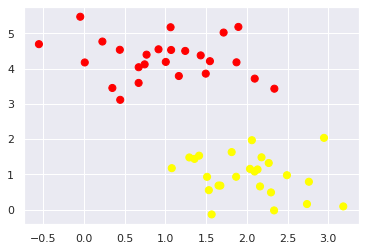

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### What is a *Hyperplane*?

In a $k$-dimensional space, a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) is a flat affine subspace of dimension $k-1$. For instance, in two dimensions, a hyperplane is a flat one-dimensional subspace - in other words, a line. In three dimensions, a hyperplane is a flat two-dimensional subspace - that is, a plane. In $k>3$ dimensions, it can be hard to visualize a hyperplane, but the notion of a $(k-1)$ -dimensional flat subspace still applies.

The mathematical definition of a hyperplane is quite simple. In two dimensions, a hyperplane is defined by the equation

$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}=0
$$

for parameters $\beta_{0}, \beta_{1}$, and $\beta_{2}$. When we say that the above equation "defines" the hyperplane, we mean that any $X=\left(X_{1}, X_{2}\right)^{\prime}$ for which the equation holds is a point on the hyperplane. Note this equation is simply the equation of a line, since indeed in two dimensions a hyperplane is a line.

Clearly in the multidimensional case one has

$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&=0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&=0,
\end{aligned}
$$

and this defines a $k$-dimensional hyperplane in the sense that if $X=[X_1,X_2,\ldots,X_k]^{\prime}\in\mathbb{R}^{k}$ satisfies $\mathbf{x}^{\prime}\boldsymbol{\beta}=0$, then it is said that $X$ *lies* on the hyperplane.

On the other hand, if
$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&<0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&<0.
\end{aligned}
$$
then $X$ lies on the other side of the hyperplane. So we can think of the hyperplane as dividing $k$-dimensional space into two halves. One can easily determine on which side of the hyperplane a point lies by simply calculating the sign of the left hand side of $\mathbf{x}^{\prime}\boldsymbol{\beta}$.

<div>
<img src="img/91.png" width="700" align="center"/>
</div>
👆🏼 The hyperplane $1+2 X_{1}+3 X_{2}=0$ is shown. The blue region is
the set of points for which $1+2 X_{1}+3 X_{2}>0$, and the purple region is the set of
points for which $1+2 X_{1}+3 X_{2}<0$.

#### Classification using a *Separating* Hyperplane

<div>
<img src="img/92.png" width="1000" align="center"/>
</div>



Suppose we have observations $\{(y_{1},x_{1,1},x_{1,2}), (y_{2},x_{2,1},x_{2,2}),\ldots,(y_{n},x_{n1},x_{n2})\}$ and we know that these $n$ observations fall into two classes - that is $\{y_1,y_2,\ldots,y_n\}\in\{-1,1\}$ where -1 represents one class (<font color='purple'>purple</font>) and 1 the other class (<font color='blue'>blue</font>). *Left*: Three (out of many) possible separating hyperplanes. *Right*: Decision rule made by a *classifier* based on this particular hyperplane (black line). If a test observation falls in the blue portion of the grid, it will be assigned to the <font color='blue'>blue</font> case, and to the <font color='purple'>purple</font> otherwise.

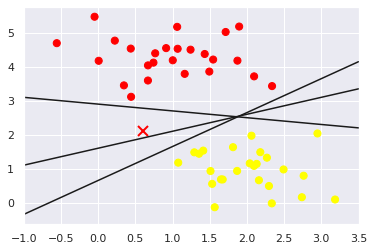

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Then a separating hyperplane for any $k$ has the property that

$$
\beta_{0}+\beta_{1} x_{i, 1}+\beta_{2} x_{i, 2}+\ldots+\beta_{k} x_{i, k}>0 \text { if } y_{i}=1
$$
and
$$
\beta_{0}+\beta_{1} x_{i, 1}+\beta_{2} x_{i, 2}+\ldots+\beta_{k} x_{i, k}<0 \text { if } y_{i}=-1\text{.}
$$
Equivalently, a separating hyperplane has the property that
$$
y_{i}\left(\beta_{0}+\beta_{1} x_{i, 1}+\beta_{2} x_{i, 2}+\ldots+\beta_{k} x_{i, k}\right)>0
$$
for all $i=1, \ldots, n$ since $y_i\in\{-1,1\}$.

<ins>Example</ins>: Imagine we are given a *test* observation $\mathbf{x}^\ast=\left[x_{1}^\ast,\ldots,x_{k}^\ast\right]^\prime$, then we 'assign' it to a class based on the sign of $\mathbf{x}^{\ast\prime}\boldsymbol{\beta}=:f(\mathbf{x}^\ast)$, i.e., if $f(\mathbf{x}^\ast)>0$ then we assign this test observation to class 1, and if $f(\mathbf{x}^\ast)<0$ then we assign it to class -1.

The **magnitude** of $f(\mathbf{x}^\ast)$ is also useful, since $f(\mathbf{x}^\ast)$ being far from zero makes us confident about its classification, but when $f(\mathbf{x}^\ast)$ is close to zero, then $\mathbf{x}^\ast$ is located near the hyperplane, and so we are less confident about the class assignment for it.

#### The Maximal Margin Classifier

<div class="foo">
    
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| &nbsp; 
------ | -----
<div><img src="img/93.png" width="5500" align="center"/></div> | We can compute the (perpendicular) distance from each training observation to a given separating hyperplane; the smallest such distance is the minimal distance from the observations to the hyperplane, and is known as the *margin*. The maximal margin hyperplane is the separating hyperplane for which the margin is largest—that is, it is the hyperplane that has the farthest minimum distance to the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies. This is known as the **maximal margin classifier**. <ins>Example</ins>: we see that three training observations are equidistant from the maximal margin hyperplane and lie along the dashed lines indicating the width of the margin. These three observations are known as **support vectors**, since they are vectors in $k$-dimensional space ($k = 2$), and they "support" the maximal margin hyperplane in the sense vector that if these points were moved slightly then the maximal margin hyperplane would move as well.

</div>

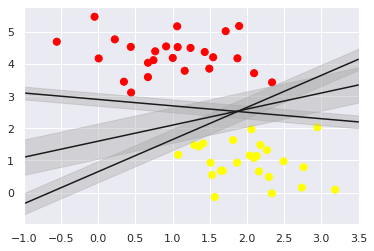

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

💻 The following fucntion will help us visualize the SVM decision boundaries:

In [6]:
# This function will plot SVM decision boundaries for us
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

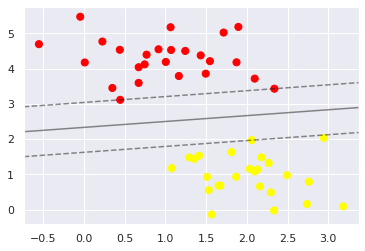

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

💻 Printing the _support vectors_.

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[50,60, 120], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(50, 60, 120), value=50), Output()), _dom_classes=('wi…

⚠️ <ins>The separating hyperplane might not exist</ins>, and so there is no maximal margin classifier.

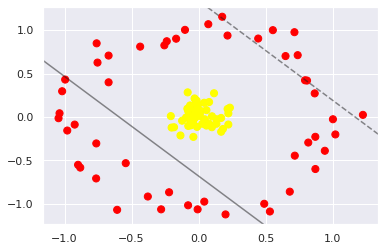

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Support Vector Classifier

The support vector classifier classifies a test observation depending on which side of a hyperplane it lies. The hyperplane is chosen to correctly separate most of the training observations into the two classes, but <ins>may misclassify a few observations</ins>. It is the solution to the optimization problem

$$
\begin{aligned}
& \underset{\beta_{0}, \beta_{1}, \ldots, \beta_{k}, \epsilon_{1}, \ldots, \epsilon_{n}}{\operatorname{maximimize}} M\\
& {\text { subject to } \sum_{j=1}^{k} \beta_{j}^{2}=1} \\
& {y_{i}\left(\beta_{0}+\beta_{1} x_{i,1}+\beta_{2} x_{i,2}+\ldots+\beta_{k} x_{i,k}\right) \geq M\left(1-\epsilon_{i}\right)} \\
& {\quad \epsilon_{i} \geq 0, \quad \sum_{i=1}^{n} \epsilon_{i} \leq C}
\end{aligned}
$$

where $C$ is a nonnegative tuning parameter, $M$ is the width of the margin (which we want to make as large as possible). The $\epsilon_{1}, \ldots, \epsilon_{n}$ are *slack variables* that allow observations to be on the wrong side of the margin.

1. The slack variable $\epsilon_{i}$ tells us where the $i$th observation is located relative to the hyperplane and the margin, i.e.,
 1. $\epsilon_{i}=0$ - the $i$th observation is on the correct side of the margin.
 2. $\epsilon_{i}>0$ - the $i$th observation is on the wrong side of the margin.
 3. $\epsilon_{i}>1$ - the $i$th observation is on the wrong side of the hyperplane.
2. The tuning parameter $C$  bounds the sum of the $\epsilon_{i}$'s, and can be considered a *tolerance* parameter.
 1. If $C=0$ there we are not allowing for violations so it must be the case that $\epsilon_{1}=\ldots=\epsilon_{n}=0$ in which case we have the maximal margin classifier (if it exists).
 2. For $C>0$ no more than $C$ observations can be on the wrong side of the hyperplane because in this case $\epsilon_{i}>1$ and we have that $\sum_{i=1}^{n} \epsilon_{i} \leq C$. As $C$ increases, we become more tolerant of violations to the margin, and so the margin will widen. Conversely, as $C$ decreases, we become less tolerant of violations to the margin and so the margin narrows.

📝 Please note that the `C` parameter in the `SVC` function acts contrary to what is described above, i.e., For very large `C`, the margin is hard, and points cannot lie in it. For smaller `C`, the margin is softer, and some points can lie within the margin. See the [Support Vector Machine Documentation](https://scikit-learn.org/stable/modules/svm.html#svc).

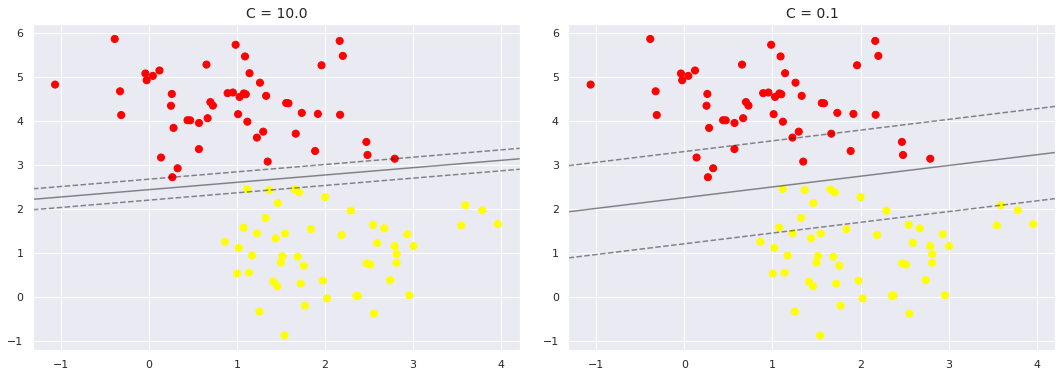

In [12]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#### Real Data Example

💻 This is a simulated data set of 10,000 observations and the objective is to build a machine that can predict loan ```default``` ('No' or 'Yes') based on the ```balance``` and ```income``` of the customers.

In [13]:
import pandas as pd

df = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-63314.csv')

In [14]:
print(df.head())
print(df.dtypes)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
default     object
student     object
balance    float64
income     float64
dtype: object


💻 We now proceed to match the 'No' and 'Yes' strings into numerical values for numerical calculations.

In [15]:
df['default']  = df['default'].map({'Yes': 1, 'No': 0})
df['student'] = df['student'].map({'Yes': 1, 'No': 0})
print(df.head())
print(df.dtypes)

   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879
default      int64
student      int64
balance    float64
income     float64
dtype: object


In [16]:
import patsy
y, X = patsy.dmatrices('default ~ -1 + balance + income', data=df, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2652124)


🛑 Do _not_ scale the original data set _before_ the split as this created correlation between the training and validation sets, i.e., _data leaking_ in Machine Learning jargon.

In [17]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [18]:
from sklearn.svm import SVC

# Build your classifier
clf = SVC(kernel='linear', C=1)

# Train it on the entire training data set
clf.fit(X_train_scaled, y_train.values.ravel())

# Get predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Assessing the fit
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9696


💻 We now choose the hyperparameter `C` by 5-fold CV over a grid of potential values for it.

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
svc = SVC(kernel='linear')

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),cv=5,n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])})

In [20]:
clf.best_score_

0.9657333333333333

💻 Printing the `C` parameter corresponding to the best fit.

In [21]:
clf.best_estimator_.C

1e-06

💻 Printing the _coefficients_ corresponding to the best fit.

In [22]:
clf.best_estimator_.coef_

array([[1.74115390e-05, 5.06273131e-07]])

In [23]:
# Prediction performance on test set is better that on train set
clf.score(X_test_scaled, y_test)

0.9696

#### Repeating the K-Fold Cross-Validation Multiple Times

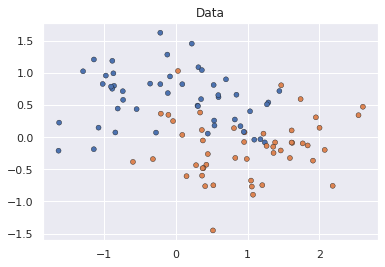

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold #RepeatedKFold
from sklearn.svm import SVC

# Specify cross-validation generator, in this case (10 x 5CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=15,random_state=2652124)

Cs = np.logspace(-2, 1, 10)

param_grid = [
    {'kernel': ['linear'], 'C': Cs}
]

svc = SVC(random_state=0)

clf = GridSearchCV(estimator=svc, param_grid=param_grid,cv=cv,n_jobs=-1)

clf.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=15, n_splits=5, random_state=2652124),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                          'kernel': ['linear']}])

In [26]:
results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
1.0_linear,"{'C': 1.0, 'kernel': 'linear'}",1,0.846000,0.064166
4.6415888336127775_linear,"{'C': 4.6415888336127775, 'kernel': 'linear'}",2,0.843333,0.065997
10.0_linear,"{'C': 10.0, 'kernel': 'linear'}",3,0.842667,0.066680
2.154434690031882_linear,"{'C': 2.154434690031882, 'kernel': 'linear'}",4,0.841333,0.066017
0.46415888336127775_linear,"{'C': 0.46415888336127775, 'kernel': 'linear'}",5,0.836000,0.077270
0.21544346900318834_linear,"{'C': 0.21544346900318834, 'kernel': 'linear'}",6,0.808000,0.080017
0.1_linear,"{'C': 0.1, 'kernel': 'linear'}",7,0.796000,0.080730
0.046415888336127774_linear,"{'C': 0.046415888336127774, 'kernel': 'linear'}",8,0.793333,0.080966
0.021544346900318832_linear,"{'C': 0.021544346900318832, 'kernel': 'linear'}",9,0.780667,0.082822


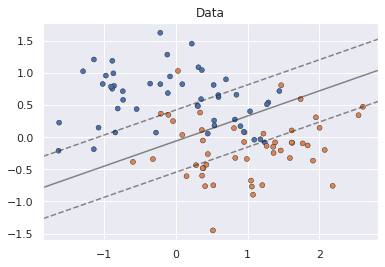

In [27]:
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plot_svc_decision_function(clf, plot_support=False);

### Support Vector Machine

The support vector classifier is a natural approach for classification in the two-class setting, if the boundary between the two classes is linear. However, in practice we are sometimes faced with non-linear class boundaries, i.e.,

<div class="foo">
    
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| &nbsp; 
------ | -----
<div><img src="img/98.png" width="5500" align="center"/></div> | Left: The observations fall into two classes, with a non-linear boundary between them. Right: The support vector classifier seeks a linear boundary, and consequently performs very poorly.

</div>

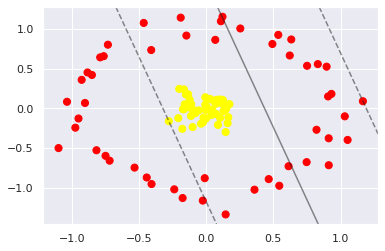

In [28]:
X, y = make_circles(100, factor=.1, noise=.1,random_state=0)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It turns out that the solution to the support vector classifier problem involves only the [*inner products*](https://en.wikipedia.org/wiki/Inner_product_space) between the point $\mathbf{x}$ and the support vectors. So if $\mathcal{S}$ is the collection of indices of these support points, we can rewrite any solution function as

$$
f(\mathbf{x})=\beta_{0}+\sum_{i \in \mathcal{S}} \alpha_{i}\left\langle \mathbf{x}, \mathbf{x}_{i}\right\rangle,
$$

where $\langle \mathbf{a}, \mathbf{b}\rangle=\sum_{j=1}^{r} a_{j} b_{j}$. Therefore we can **generalize** this solution to 

$$
f(\mathbf{x})=\beta_{0}+\sum_{i \in \mathcal{S}} \alpha_{i} K\left(\mathbf{x}, \mathbf{x}_{i}\right),
$$

where $K$ is called a [*kernel*](https://scikit-learn.org/stable/modules/svm.html#kernel-functions).

<div class="foo">
    
&nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 
 ------ | ------ | ------ 
  Name | Kernel | Parameter 
  Linear | $K\left(\mathbf{x}_{i}, \mathbf{x}_{i^{\prime}}\right)=\sum_{j=1}^{k} \mathbf{x}_{i j} \mathbf{x}_{i^{\prime} j}$ | ```C```
 Polynomial | $K\left(\mathbf{x}_{i}, \mathbf{x}_{i^{\prime}}\right)=\left(r+\sum_{j=1}^{k} x_{i j} x_{i^{\prime} j}\right)^{d}$ | $d$ (```degree```), ```C```, $r$ (`coef0`)
 Radial | $K\left(\mathbf{x}_{i}, \mathbf{x}_{i^{\prime}}\right)=\exp \left(-\gamma \sum_{j=1}^{k}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}\right)$ | $\gamma$ (```gamma```) and ```C```
 
</div>

In [29]:
clf = SVC(kernel='rbf', C=1E6, gamma=1)
clf.fit(X, y)

SVC(C=1000000.0, gamma=1)

💻 Printing the support vectors.

In [30]:
clf.support_vectors_

array([[-0.40867925,  0.73225992],
       [-0.90136274,  0.06675095],
       [ 0.62194713,  0.66363424],
       [-0.53262577, -0.74551749],
       [-0.01059175, -0.87830074],
       [ 0.06782759,  0.86000564],
       [ 0.82087304, -0.26971282],
       [-0.20035062,  0.24428624],
       [ 0.14497035, -0.29878438]])

💻 Printing the indices of the support vectors above

In [31]:
clf.support_

array([ 6, 17, 26, 66, 81, 87, 98, 38, 69], dtype=int32)

💻 Printing the estimated intercept, $\beta_0$,

In [32]:
clf.intercept_

array([-1.61261962])

💻 Printing the $\{y_{[i]}\alpha_{[i]};i\in\mathcal{S}\}$ for the support vectors.

In [33]:
clf.dual_coef_

array([[-1.75733331, -1.12480354, -0.29905036, -0.11729488, -1.86447124,
        -0.47809977, -1.56643087,  3.67812046,  3.52936351]])

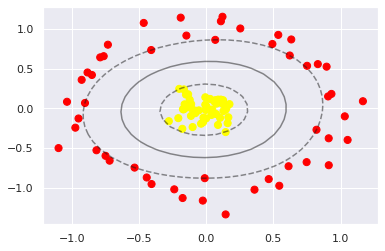

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#### Real Data Example

In [35]:
svcPoly = SVC(kernel='poly',degree=3,coef0=1)

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svcPoly, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print(clf.best_score_ )
print(clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)

0.9715999999999999
0.1


0.9764

In [36]:
svcRadial = SVC(kernel='rbf',gamma=.01)

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svcRadial, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print(clf.best_score_ )
print(clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)

0.9657333333333333
1e-06


0.9696

#### Repeating the K-Fold Cross-Validation Multiple Times

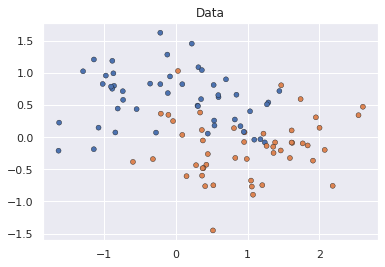

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

# Specify cross-validation generator, in this case (10 x 5CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10,random_state=2652124)

Cs = np.logspace(-2, 1, 10)

param_grid = [
    {'kernel': ['linear'], 'C': Cs},
    {'kernel': ['poly'], 'degree': [2, 3], 'coef0': [1,2]},
    {'kernel': ['rbf'], 'gamma': [1,2], 'C': Cs}
]

svc = SVC(random_state=0)

clf = GridSearchCV(estimator=svc, param_grid=param_grid,cv=cv,n_jobs=-1)

clf.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=2652124),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                          'kernel': ['linear']},
                         {'coef0': [1, 2], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                          'gamma': [1, 2], 'kernel': ['rbf']}])

We can now inspect the results of our search, sorted by their `mean_test_score`:

In [39]:
import pandas as pd

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
2.154434690031882_2_rbf,"{'C': 2.154434690031882, 'gamma': 2, 'kernel':...",1,0.869,0.062362
4.6415888336127775_1_rbf,"{'C': 4.6415888336127775, 'gamma': 1, 'kernel'...",2,0.869,0.056471
4.6415888336127775_2_rbf,"{'C': 4.6415888336127775, 'gamma': 2, 'kernel'...",3,0.866,0.063592
2.154434690031882_1_rbf,"{'C': 2.154434690031882, 'gamma': 1, 'kernel':...",4,0.865,0.057663
1.0_2_rbf,"{'C': 1.0, 'gamma': 2, 'kernel': 'rbf'}",5,0.864,0.060033
10.0_1_rbf,"{'C': 10.0, 'gamma': 1, 'kernel': 'rbf'}",6,0.863,0.063883
10.0_2_rbf,"{'C': 10.0, 'gamma': 2, 'kernel': 'rbf'}",7,0.858,0.068088
0.46415888336127775_2_rbf,"{'C': 0.46415888336127775, 'gamma': 2, 'kernel...",8,0.855,0.067268
1_3_poly,"{'coef0': 1, 'degree': 3, 'kernel': 'poly'}",9,0.853,0.071000


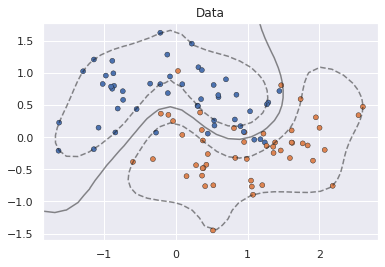

In [40]:
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plot_svc_decision_function(clf, plot_support=False);